### KNN基础

1. 解决分类问题
2. 天然可以解决多分类问题
3. 思想简单，效果强大，但效率低下
4. 高度数据相关
5. 预测结果不具有可解释性
6. 维数灾难：纬度越高，“看似相近”两个点之间的距离越来越大（解决方法：降维）
7. 使用k近邻算法解决回归问题 ： KNeighborsRegressor


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]]

raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [24]:
# X_train

In [25]:
# raw_data_X

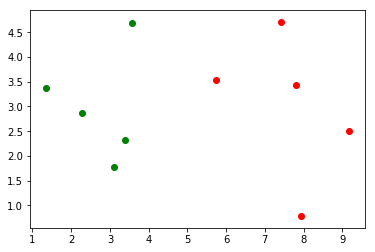

In [5]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

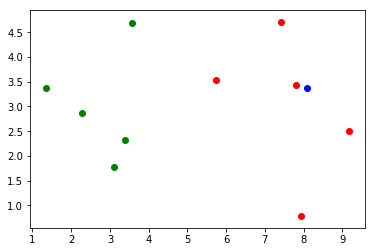

In [10]:
x = np.array([8.093607318, 3.365731514])  #x是需要预测的特征点

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()


>计算a点和b点间在各个维度X (x1,x2...xn)的距离：

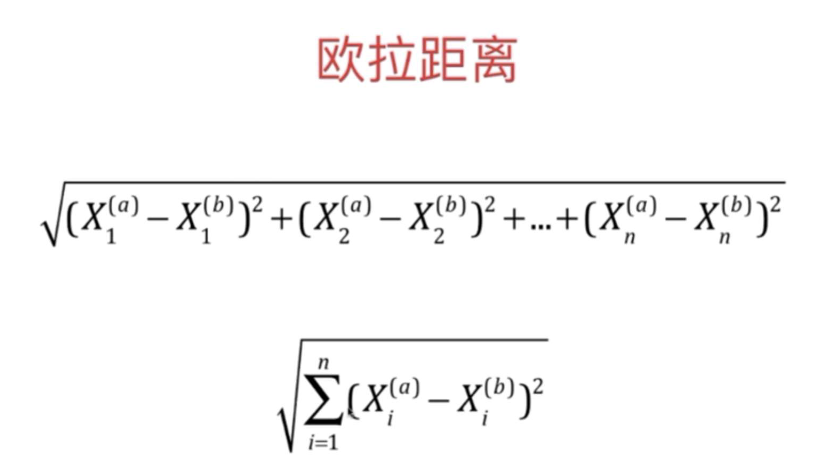


### kNN过程
> 1.求训练集中每个点和x [8.093607318, 3.365731514] 的欧式距离：

In [12]:
from math import sqrt

distances = [] 
for x_train in X_train: 
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d) 
    

In [13]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

> 2. 对所有距离排序

In [14]:
np.argsort(distances) #返回的是排好序的每个的索引 x[index] = xlabel  y[index] = ylabel

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

> 2.查看与x最近的k=6个点的y label

In [15]:
nearest = np.argsort(distances)
k=6
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]  #nearest的前k个

> 3.对数组中的元素和频次统计

In [16]:
from collections import Counter
votes = Counter(topK_y)     #votes -> Counter({0: 1, 1: 5}),即0有1票，1有5票
votes.most_common(1)#票数最多的1个元素  -> [(1,5)]  （1，5）是一个元祖

[(1, 5)]

> 4.得到预测结果

In [23]:
predict_y = votes.most_common(1)[0]#拿出票数最多的第一个值的首个元组的首个值   
predict_y[0]

1